# 探索影响泰坦尼克号乘客生还的因素
猜测的可能影响因素如下：
1、乘客所属社会阶级
2、乘客年龄
3、性别

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#加载数据集
full_data = pd.read_csv('titanic-data.csv')
full_data.head()

def get_survival_rate_by_category(passengers,category):
    
    return passengers.groupby(category).mean()['Survived']

def passengers_count(data,category):
        return data.groupby(category)['PassengerId'].count()
        


In [2]:
full_data.info()   #查看是否有缺失字符段

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
#由于年龄中有缺失字符段，可选择去除年龄缺失的幸存人员数据或者将缺失字段进行填充，本次选择取已有年龄的平均值进行填充
mean_age = full_data['Age'].mean()
full_data['Age'].fillna(mean_age,inplace = True)

#将年龄分为儿童，青年，壮年，老年三个类别
bins = [0,16,20,50,100]
group_names = ['Children','Adolescents','Adults','Old']

age_group = pd.cut(full_data['Age'],bins,labels = group_names)
full_data['age_group'] = age_group
full_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adults


In [4]:
#提取幸存人员信息

survived_data_df = full_data[full_data.Survived==1]
survived_count = len(survived_data_df)     #幸存人员总数
survived_data_df.head()   #check


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adults
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Children


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


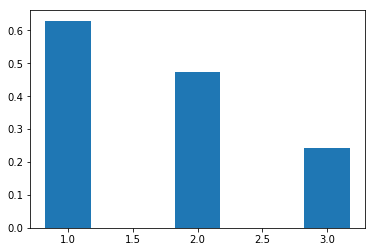

In [5]:
#计算幸存人员中各个等级人员所占比例
survival_rate_by_Pclass = get_survival_rate_by_category(full_data,'Pclass')
print survival_rate_by_Pclass
tx = [1,2,3]
plt.bar(tx,survival_rate_by_Pclass,width = 0.35)
plt.xlabel = ('Pclass')




Pclass
1    0.397661
2    0.254386
3    0.347953
Name: PassengerId, dtype: float64


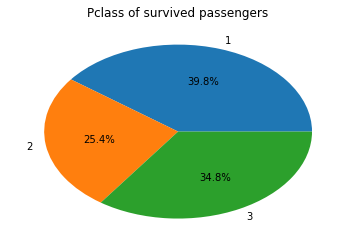

In [7]:
Pclass_proportion_of_suvived = passengers_count(survived_data_df,'Pclass')/ survived_count
print Pclass_proportion_of_suvived
#根据幸存人员中各社会等级人数占总幸存人员的比例画出饼图
labels = ['1','2','3']
plt.pie(Pclass_proportion_of_suvived,labels=labels,autopct='%1.1f%%')
plt.title('Pclass of survived passengers')

从上一段直方图和饼图可以看出，社会级别在1等的幸存率为0.63,2等的幸存率为0.47，3等的幸存率为0.24；幸存者中1等占总幸存人数的0,40,2等占0.25，3等占0.35。可以得出的结论为社会等级越高幸存的可能性越大。

age_group
Children       0.550000
Adolescents    0.341772
Adults         0.367284
Old            0.343750
Name: Survived, dtype: float64


<Container object of 4 artists>

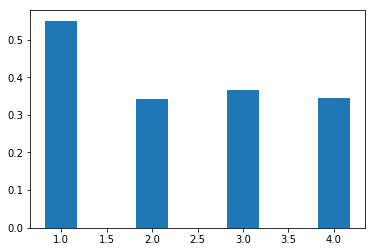

In [8]:

survival_rate_by_age = get_survival_rate_by_category(full_data,'age_group')
print survival_rate_by_age
xage = [1,2,3,4]
plt.bar(xage,survival_rate_by_age,width = 0.35)

age_group
Children       0.160819
Adolescents    0.078947
Adults         0.695906
Old            0.064327
Name: PassengerId, dtype: float64


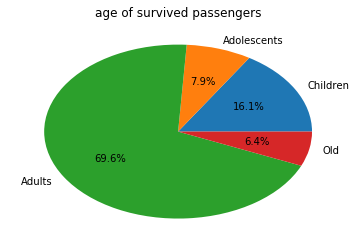

In [9]:

age_proportion_of_survived = passengers_count(survived_data_df,'age_group')/ survived_count
print age_proportion_of_survived
#根据幸存人员中各社会等级人数占总幸存人员的比例画出饼图
y = ['Children','Adolescents','Adults','Old']
plt.pie(age_proportion_of_survived,labels=y,autopct='%1.1f%%')
plt.title('age of survived passengers')

从以上直方图和饼图可以看出，儿童的幸存率为0.16,青年的幸存率为0.08，成年人的幸存率为0.70，老年人的幸存率为0.06；幸存者中儿童占总幸存人数的0,16,青年占0.08，成年人占0.70，老年人占0.06。可以得出的结论为成年人的幸存率最高，其次为儿童，老年人的幸存率最低。

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<Container object of 2 artists>

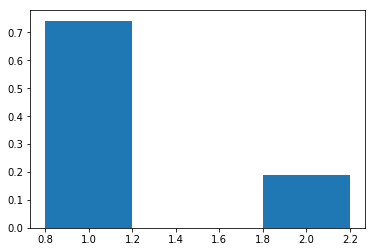

In [10]:
survival_rate_by_sex = get_survival_rate_by_category(full_data,'Sex')
print survival_rate_by_sex
xsex = [1,2]
plt.bar(xsex,survival_rate_by_sex,width = 0.4)

Sex
female    0.681287
male      0.318713
Name: PassengerId, dtype: float64


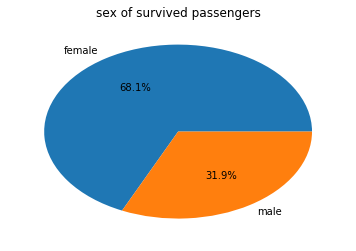

In [11]:

sex_proportion_of_survived = passengers_count(survived_data_df,'Sex')/ survived_count
print sex_proportion_of_survived
#根据幸存人员中各社会等级人数占总幸存人员的比例画出饼图
y = ['female','male']
plt.pie(sex_proportion_of_survived,labels=y,autopct='%1.1f%%')
plt.title('sex of survived passengers')

从以上直方图和饼图可以看出，女性的幸存率为0.74,男性的幸存率为0.19；幸存者中女性占总幸存人数的0,68,男性占0.32。可以得出的结论为女性幸存率高于男性。

总的从社会等级、年龄和性别来看的话，高等级的成年女性最有可能在泰坦尼克号的事故中幸存。